In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
ID_train = train['ID']
ID_test = test['ID']

In [6]:
train['Train_Test'] = 0
test['Train_Test'] = 1

In [7]:
df = pd.concat([train, test], ignore_index=True)

In [8]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Train_Test
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B,1
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A,1
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C,1
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
 11  Train_Test       10695 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB


# Plan
- Get used to the data
- Data clearning
- Exploratory data analysis
- Check whether the target is skewed.
- Handle missing values
- Handle outliers
- Check correlation between numerical variables
- Add features if needed
- Skewed data
- Scale data
- Get dummies and label encoding
- Train-Test-Val split
- Train model

# Get used to the data

In [10]:
for col in df.columns:
    print('###', col, ':\n')
    if len(df[col].unique()) >= 10:
        print(df[col].unique()[:10], ' (len = {})\n'.format(len(df[col].unique())))
    else:
        print(df[col].unique(), ' (len = {})\n'.format(len(df[col].unique())), '\n')
    print('Dtype: {}'.format(df[col].dtype))
    print('Number of null values: {}'.format(df[col].isnull().sum()), '\n')
    print('---------------------\n')

### ID :

[462809 462643 466315 461735 462669 461319 460156 464347 465015 465176]  (len = 8363)

Dtype: int64
Number of null values: 0 

---------------------

### Gender :

['Male' 'Female']  (len = 2)
 

Dtype: object
Number of null values: 0 

---------------------

### Ever_Married :

['No' 'Yes' nan]  (len = 3)
 

Dtype: object
Number of null values: 190 

---------------------

### Age :

[22 38 67 40 56 32 33 61 55 26]  (len = 67)

Dtype: int64
Number of null values: 0 

---------------------

### Graduated :

['No' 'Yes' nan]  (len = 3)
 

Dtype: object
Number of null values: 102 

---------------------

### Profession :

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]  (len = 10)

Dtype: object
Number of null values: 162 

---------------------

### Work_Experience :

[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8.]  (len = 16)

Dtype: float64
Number of null values: 1098 

---------------------

### Spending_Score :

['Low

In [11]:
# Comments

'''
- Drop ID
- Age => AgeGroup
- Check the relation between nans of Profession and Work_Experience
- Text mining for Var_1
''';

# Cleaning data

In [12]:
# Drop ID column
df.drop(['ID'], axis=1, inplace=True)

In [13]:
# Text mining for Var_1

df['Var_1'] = df['Var_1'].apply(lambda x: float(x.split('_')[1]) if type(x)!=float else x)

# Exploratory Data Analysis (EDA) on raw data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

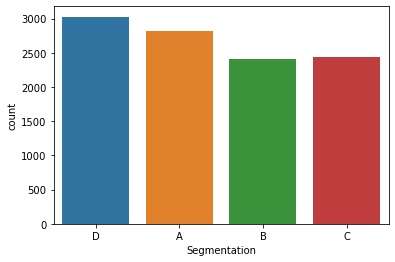

In [15]:
# Target Variable

sns.countplot(data=df, x='Segmentation')
plt.show()

All 4 classes distribute quite evenly. It is good to use accuracy as a metric

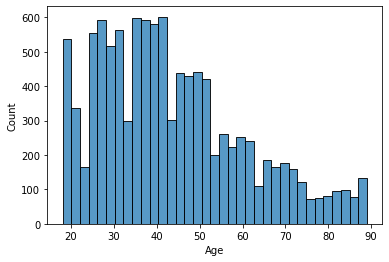

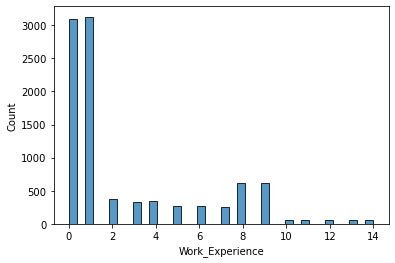

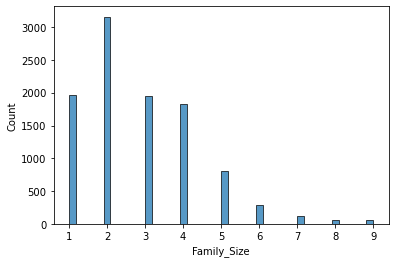

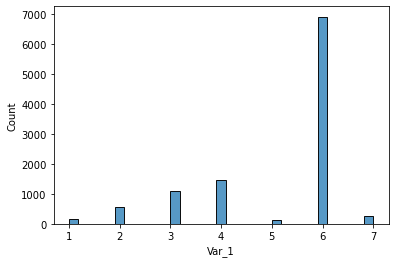

In [16]:
#####################################
# Numerical Variables (Univariable) #
#####################################

num_cols = ['Age', 'Work_Experience', 'Family_Size', 'Var_1']

for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.show()

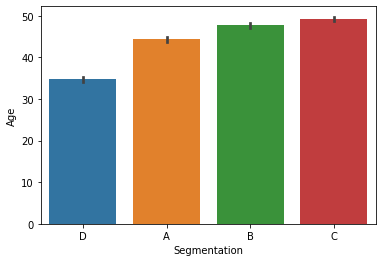

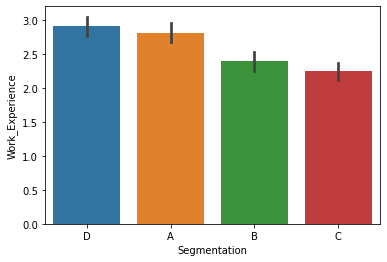

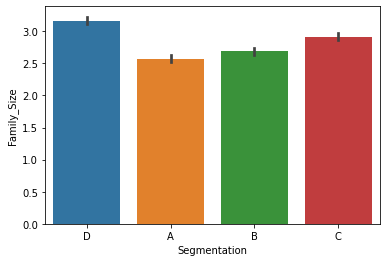

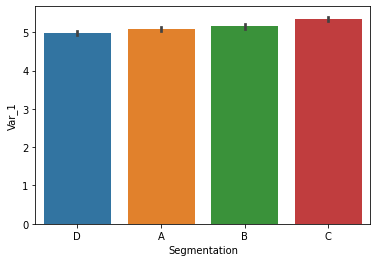

In [17]:
#######################################
# Numerical Variables (Multivariable) #
#######################################

num_cols = ['Age', 'Work_Experience', 'Family_Size', 'Var_1']

for col in num_cols:
    sns.barplot(data=df, x='Segmentation', y=col)
    plt.show()

<AxesSubplot:>

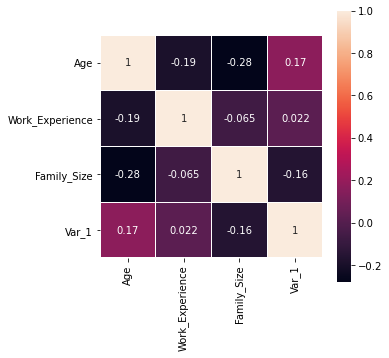

In [18]:
###########################################
# Correlation between numerical variables #
###########################################

fig = plt.figure(figsize=(5,5))
sns.heatmap(data=df[num_cols].corr(), annot=True, linewidths=0.5, square=True)

There is no strong correlation between numerical variables.

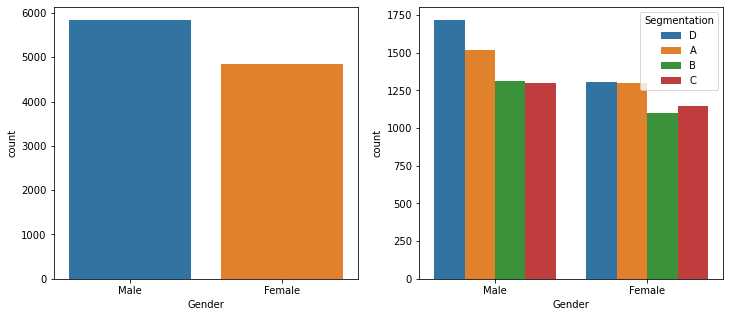

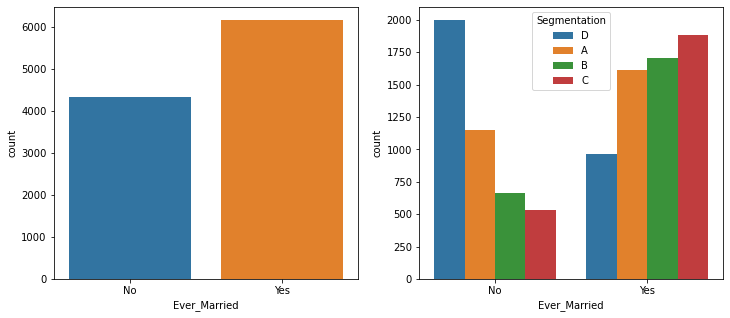

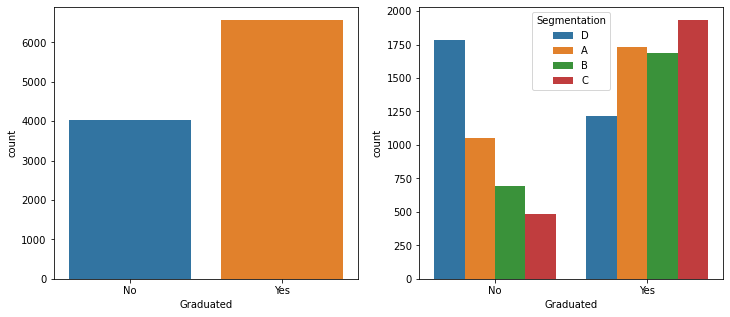

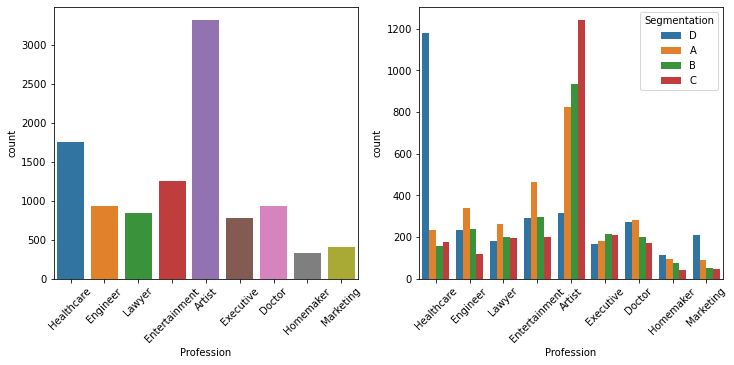

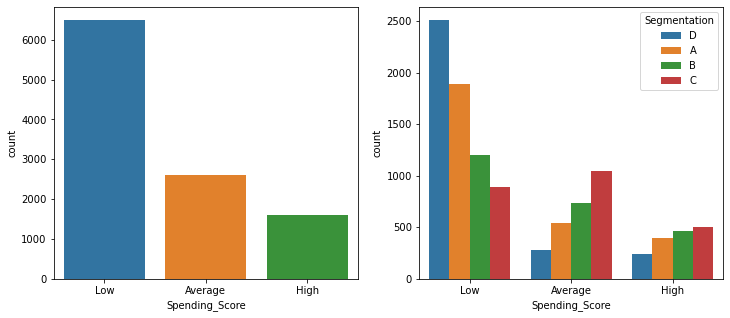

In [19]:
#########################
# Categorical variables #
#########################

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

for col in cat_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    sns.countplot(data=df, x=col, ax=ax[0])
    if col == 'Profession':
        ax[0].tick_params(axis='x', rotation=45)
    
    sns.countplot(data=df, x=col, hue='Segmentation', ax=ax[1])
    if col == 'Profession':
        ax[1].tick_params(axis='x', rotation=45)
        
    plt.show()

# Handle missing values

In [20]:
df.isnull().sum().sort_values(ascending=False)

Work_Experience    1098
Family_Size         448
Ever_Married        190
Profession          162
Var_1               108
Graduated           102
Gender                0
Age                   0
Spending_Score        0
Segmentation          0
Train_Test            0
dtype: int64

In [21]:
# Both Profession and Work_Experience is null

index = df[(df['Profession'].isnull()) & (df['Work_Experience'].isnull())].index

df.drop(index=index, inplace=True)

In [22]:
# Profession

df['Profession'] = df['Profession'].fillna('Other')

In [23]:
# Work_Experience

df['Work_Experience'] = df.groupby(by='Profession')['Work_Experience'].apply(lambda x: x.fillna(x.mode()[0]))

In [24]:
# Both Family_Size and Ever_Married is null

index = df[(df['Family_Size'].isnull()) & (df['Ever_Married'].isnull())].index

df.drop(index=index, inplace=True)

In [25]:
# Family_Size

df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].mode()[0])

In [26]:
# Ever_Married

df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])

In [27]:
# Graduated

df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])

In [28]:
# Var_1

df.dropna(subset=['Var_1'], inplace=True)

In [29]:
df.isnull().sum().sort_values(ascending=False)

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
Train_Test         0
dtype: int64

# Create new features

In [30]:
bins = [17,30,40,50,60, 70, 80, 90]
labels = [0,1,2,3,4,5,6]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels).astype(int)

In [31]:
df.drop(columns=['Age'], inplace=True)

# Skewed data

In [32]:
df.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Train_Test,Age_Group
0,Male,No,No,Healthcare,1.0,Low,4.0,4.0,D,0,0
1,Female,Yes,Yes,Engineer,0.0,Average,3.0,4.0,A,0,1
2,Female,Yes,Yes,Engineer,1.0,Low,1.0,6.0,B,0,4
3,Male,Yes,Yes,Lawyer,0.0,High,2.0,6.0,B,0,4
4,Female,Yes,Yes,Entertainment,1.0,High,6.0,6.0,A,0,1


In [33]:
num_cols = ['Work_Experience', 'Family_Size', 'Var_1', 'Age_Group']

# Set skew limit to 0.75
skew_limit = 0.75

# Get a Series of each numerical column with its skewness
skew_vals = df[num_cols].skew()

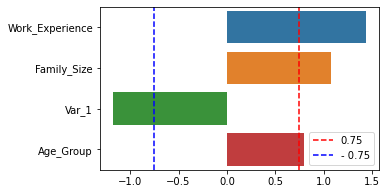

In [34]:
# Plot skewness
fig = plt.figure(figsize=(5,3))
sns.barplot(x=skew_vals.values, y=skew_vals.index)
plt.axvline(x=0.75, color='r', linestyle='--', label='0.75')
plt.axvline(x=-0.75, color='b', linestyle='--', label='- 0.75')
plt.legend()

In [35]:
# Get a list of numerical columns which have absolute skewness greater than skew_limit
skew_cols = skew_vals[abs(skew_vals) > skew_limit].index

# Apply np.log1p to all features that have absolute skewness greater than skew_limit
for col in skew_cols:
    df[col] = df[col].apply(np.log1p)

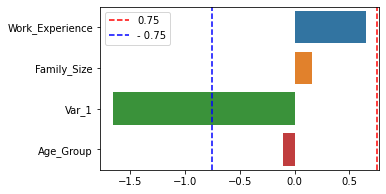

In [36]:
skew_vals = df[num_cols].skew()

# Plot skewness after applying np.log1p
fig = plt.figure(figsize=(5,3))
sns.barplot(x=skew_vals.values, y=skew_vals.index)
plt.axvline(x=0.75, color='r', linestyle='--', label='0.75')
plt.axvline(x=-0.75, color='b', linestyle='--', label='- 0.75')
plt.legend()

# Scale data

In [37]:
# Import libraries
from sklearn.preprocessing import StandardScaler

In [38]:
num_cols = ['Work_Experience', 'Family_Size', 'Var_1', 'Age_Group']

# Scale data
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Label Encoding and Getting Dummies

In [39]:
# Spending_Score

df['Spending_Score'] = df['Spending_Score'].map({'Low':0, 'Average':1, 'High':2})

In [40]:
# Segmentation
df['Segmentation'] = df['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3})

In [41]:
label_cols = ['Gender', 'Ever_Married', 'Graduated', ]
dummies_cols = ['Profession']

In [42]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [43]:
# Getting dummies

final_df = pd.get_dummies(df, drop_first=True)

In [44]:
final_df.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Train_Test,Age_Group,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Other
0,1,0,0,-0.182741,0,0.904475,-0.585728,3,0,-1.418076,0,0,0,0,1,0,0,0,0
1,0,1,1,-1.009365,1,0.319098,-0.585728,0,0,-0.281687,0,1,0,0,0,0,0,0,0
2,0,1,1,-0.182741,0,-1.499248,0.579276,1,0,1.220536,0,1,0,0,0,0,0,0,0
3,1,1,1,-1.009365,2,-0.435584,0.579276,1,0,1.220536,0,0,0,0,0,0,1,0,0
4,0,1,1,-0.182741,2,1.787149,0.579276,0,0,-0.281687,0,0,1,0,0,0,0,0,0


# Version 1

# Train Test split

In [45]:
df_train = final_df[final_df['Train_Test'] == 0]
df_test = final_df[final_df['Train_Test'] == 1]

In [46]:
# Drop Train_Test column
df_train.drop(['Train_Test'], axis=1, inplace=True)
df_test.drop(['Train_Test'], axis=1, inplace=True)

In [47]:
# Split data
X_train = df_train.drop(['Segmentation'], axis=1)
y_train = df_train['Segmentation']
X_test = df_test.drop(['Segmentation'], axis=1)
y_test = df_test['Segmentation']

In [48]:
# print size of X_train, y_train, X_val, y_val, X_test, y_test
print('Size of X_train:', X_train.shape)
print('Size of y_train:', y_train.shape)
print('Size of X_test:', X_test.shape)
print('Size of y_test:', y_test.shape)

Size of X_train: (7955, 17)
Size of y_train: (7955,)
Size of X_test: (2586, 17)
Size of y_test: (2586,)


# Quick dirty training

In [49]:
# Import libraries

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVR, SVC

from sklearn.model_selection import cross_val_score

In [50]:
# Models

'''
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression(random_state=11)
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11)
dt= DecisionTreeClassifier(random_state=11)
knn = KNeighborsClassifier()
svc = SVC(probability=True, random_state=11)
ridge_c = RidgeClassifier(random_state=11)

model_list = [rf, lr, xgb, dt, knn, svc, ridge_c]

for model in model_list:
    scores = cross_val_score(model, X=X_train, y=y_train, scoring='accuracy', cv=5)
    print(u'Score of {}: {} \u00B1 {}'.format(type(model).__name__, round(scores.mean(), 4), round(scores.std(), 4)))
''';

- Score of RandomForestClassifier: 0.4797 ± 0.011
- Score of LogisticRegression: 0.5067 ± 0.0118
- Score of XGBClassifier: 0.5095 ± 0.0049
- Score of DecisionTreeClassifier: 0.4414 ± 0.0077
- Score of KNeighborsClassifier: 0.4655 ± 0.007
- Score of SVC: 0.5214 ± 0.0057
- Score of RidgeClassifier: 0.4977 ± 0.0117

# Hyperparameters

In [51]:
# Import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
# Define a function for RandomizedSearchCV

def search(model, params):
    model_gridsearch = RandomizedSearchCV(model, params, cv=5,
                              scoring='accuracy', n_jobs=-1, random_state=11)
    model_gridsearch.fit(X_train, y_train)
    
    print(type(model).__name__, '\n')
    print('Best parameters: {}'.format(model_gridsearch.best_params_), '\n')
    print('Best score: {}'.format(model_gridsearch.best_score_), '\n\n')

In [53]:
# Random Forest Classifier

'''
rf_params = {
    'n_estimators': np.random.randint(1,500,100),
    'criterion': ['gini', 'entropy'],
    #'max_depth': np.random.randint(1,100,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_split': np.random.randint(2,100,100)
    
}

rf = RandomForestClassifier(random_state=11)

search(rf, rf_params)
''';

RandomForestClassifier 

Best parameters: {'n_estimators': 434, 'max_features': 'log2', 'criterion': 'entropy'} 

Best score: 0.48258956631049654 

In [54]:
# Logistic Regression

'''
lr_params = {
    'solver': ['liblinear'],
    'penalty': ['l2','l1'],
    'C': 10**np.random.uniform(-4,3,100),
    'max_iter': [4000]
}

lr = LogisticRegression(random_state=11)

search(lr, lr_params)
''';

LogisticRegression 

Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 4000, 'C': 0.6412047763532598} 

Best score: 0.5088623507228158 

In [55]:
# XGB Classifiers

'''
xgb_params= {
    'learning_rate': 10**np.random.uniform(-4,2,20), 
    "subsample": np.random.uniform(0,1,5),
    'max_depth': np.random.randint(1,50,5),
    "gamma" : np.random.uniform(1,100,10),             
    'n_estimators': np.random.randint(1,100,100)
}

xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11)

search(xgb, xgb_params)
''';

XGBClassifier 

Best parameters: {'subsample': 0.6945918635432105, 'n_estimators': 10, 'max_depth': 8, 'learning_rate': 0.14624430779801953, 'gamma': 12.058526563328263} 

Best score: 0.49377749842866125 

In [56]:
# Decision Tree

'''
tree_params = {
    'max_depth': np.random.randint(1,50,100),       
    'max_features' :["auto", "log2", None]
}

dt= DecisionTreeClassifier(random_state=11)

search(dt, tree_params)
''';

DecisionTreeClassifier 

Best parameters: {'max_features': None, 'max_depth': 6} 

Best score: 0.49201759899434316 

In [57]:
# KNeighbors Classifier

'''
knn_params = {
    'n_neighbors' : np.random.randint(1,50,100), 
    'leaf_size': np.random.randint(1,50,100),
    'p': np.random.randint(1,50,100),
    'metric' :["euclidean","manhattan","minkowski"],
    'weights' :["uniform", "distance"]
}

knn = KNeighborsClassifier()

search(knn, knn_params)
''';

KNeighborsClassifier 

Best parameters: {'weights': 'uniform', 'p': 17, 'n_neighbors': 21, 'metric': 'euclidean', 'leaf_size': 13} 

Best score: 0.49377749842866114 

In [58]:
# SVC

'''
svc_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C' : 10**np.random.uniform(-4,1,10), 
    #'degree': np.random.randint(1,50,5),
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True, random_state=11)

search(svc, svc_params)
''';

SVC 

Best parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 3.7838899723731028} 

Best score: 0.5263356379635449 


In [59]:
# Ridge Classifier

'''
ridge_params = {
    'max_iter': np.random.randint(1,200,100), 
    'alpha': 10**np.random.uniform(-4,2,100)
}

ridge_c = RidgeClassifier(random_state=11)

search(ridge_c, ridge_params)
''';

RidgeClassifier 

Best parameters: {'max_iter': 115, 'alpha': 48.89750953175798} 

Best score: 0.4988057825267128 


# Prediction

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [61]:
rf = RandomForestClassifier(random_state=11, n_estimators=450, max_features='log2', criterion='entropy')
lr = LogisticRegression(random_state=11, solver='liblinear', penalty='l1', max_iter=4000, C=0.64)
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11,
                   subsample=0.7, n_estimators=10, max_depth=8, learning_rate=0.15, gamma=12)
dt= DecisionTreeClassifier(random_state=11, max_features=None, max_depth=6)
knn = KNeighborsClassifier(weights='uniform', p=17, n_neighbors=21, metric='euclidean', leaf_size=13)
svc = SVC(probability=True, random_state=11, kernel='rbf', gamma='auto', C=3.8)
ridge_c = RidgeClassifier(random_state=11, max_iter=115, alpha=49)


model_list = [rf, lr, xgb, dt, knn, svc, ridge_c]

pred_list = list()

for model in model_list:
    model.fit(X_train, y_train)
    pred_list.append(model.predict(X_test))

In [62]:
for index, pred in enumerate(pred_list):
    print(u'Score of {} on test set: {}'.format(type(model_list[index]).__name__, round(accuracy_score(y_test, pred), 4)))

Score of RandomForestClassifier on test set: 0.309
Score of LogisticRegression on test set: 0.3318
Score of XGBClassifier on test set: 0.331
Score of DecisionTreeClassifier on test set: 0.3395
Score of KNeighborsClassifier on test set: 0.3256
Score of SVC on test set: 0.3271
Score of RidgeClassifier on test set: 0.3287


# Version 2

# Train Test Split

In [63]:
df_ver2 = final_df.drop(['Train_Test'], axis=1)

In [64]:
# Set X, y from df
X = df_ver2.drop(['Segmentation'], axis=1)
y = df_ver2['Segmentation']

In [65]:
# Import libraries
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [66]:
# print size of X_train, y_train, X_val, y_val, X_test, y_test
print('Size of X_train:', X_train.shape)
print('Size of y_train:', y_train.shape)
print('Size of X_test:', X_test.shape)
print('Size of y_test:', y_test.shape)

Size of X_train: (8432, 17)
Size of y_train: (8432,)
Size of X_test: (2109, 17)
Size of y_test: (2109,)


# Quick dirty training

In [67]:
# Models

'''
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression(random_state=11)
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11)
dt= DecisionTreeClassifier(random_state=11)
knn = KNeighborsClassifier()
svc = SVC(probability=True, random_state=11)
ridge_c = RidgeClassifier(random_state=11)

model_list = [rf, lr, xgb, dt, knn, svc, ridge_c]

for model in model_list:
    scores = cross_val_score(model, X=X_train, y=y_train, scoring='accuracy', cv=5)
    print(u'Score of {}: {} \u00B1 {}'.format(type(model).__name__, round(scores.mean(), 4), round(scores.std(), 4)))
''';

- Score of RandomForestClassifier: 0.4082 ± 0.0074
- Score of LogisticRegression: 0.4552 ± 0.0115
- Score of XGBClassifier: 0.4545 ± 0.0102
- Score of DecisionTreeClassifier: 0.3825 ± 0.0048
- Score of KNeighborsClassifier: 0.4082 ± 0.0122
- Score of SVC: 0.466 ± 0.0097
- Score of RidgeClassifier: 0.4533 ± 0.0141

# Tune Hyperparameters

In [68]:
# Random Forest Classifier

'''
rf_params = {
    'n_estimators': np.random.randint(1,500,100),
    'criterion': ['gini', 'entropy'],
    #'max_depth': np.random.randint(1,100,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_split': np.random.randint(2,100,100)
    
}

rf = RandomForestClassifier(random_state=11)

search(rf, rf_params)
''';

RandomForestClassifier 

Best parameters: {'n_estimators': 458, 'max_features': 'auto', 'criterion': 'entropy'} 

Best score: 0.41046098804548914 

In [69]:
# Logistic Regression

'''
lr_params = {
    'solver': ['liblinear'],
    'penalty': ['l2','l1'],
    'C': 10**np.random.uniform(-4,3,100),
    'max_iter': [4000]
}

lr = LogisticRegression(random_state=11)

search(lr, lr_params)
''';

LogisticRegression 

Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 4000, 'C': 144.03602594203227} 

Best score: 0.45540821901625794 

In [70]:
# XGB Classifiers

'''
xgb_params= {
    'learning_rate': 10**np.random.uniform(-4,2,20), 
    "subsample": np.random.uniform(0,1,5),
    'max_depth': np.random.randint(1,50,5),
    "gamma" : np.random.uniform(1,100,10),             
    'n_estimators': np.random.randint(1,100,100)
}

xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11)

search(xgb, xgb_params)
''';

XGBClassifier 

Best parameters: {'subsample': 0.3056589642057873, 'n_estimators': 24, 'max_depth': 32, 'learning_rate': 0.9937410630210792, 'gamma': 14.379990851004578} 

Best score: 0.4450881452682962 


In [71]:
# Decision Tree

'''
tree_params = {
    'max_depth': np.random.randint(1,50,100),       
    'max_features' :["auto", "log2", None]
}

dt= DecisionTreeClassifier(random_state=11)

search(dt, tree_params)
''';

DecisionTreeClassifier 

Best parameters: {'max_features': None, 'max_depth': 2} 

Best score: 0.4216069995872421 

In [72]:
# KNeighbors Classifier

'''
knn_params = {
    'n_neighbors' : np.random.randint(1,50,100), 
    'leaf_size': np.random.randint(1,50,100),
    'p': np.random.randint(1,50,100),
    'metric' :["euclidean","manhattan","minkowski"],
    'weights' :["uniform", "distance"]
}

knn = KNeighborsClassifier()

search(knn, knn_params)
''';

KNeighborsClassifier 

Best parameters: {'weights': 'uniform', 'p': 7, 'n_neighbors': 39, 'metric': 'minkowski', 'leaf_size': 13} 

Best score: 0.43999132294195864 

In [73]:
# SVC

'''
svc_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C' : 10**np.random.uniform(-4,1,10), 
    #'degree': np.random.randint(1,50,5),
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True, random_state=11)

search(svc, svc_params)
''';

SVC 

Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.530149246585413} 

Best score: 0.46299937910516603 

In [74]:
# Ridge Classifier

'''
ridge_params = {
    'max_iter': np.random.randint(1,200,100), 
    'alpha': 10**np.random.uniform(-4,2,100)
}

ridge_c = RidgeClassifier(random_state=11)

search(ridge_c, ridge_params)
'''

"\nridge_params = {\n    'max_iter': np.random.randint(1,200,100), \n    'alpha': 10**np.random.uniform(-4,2,100)\n}\n\nridge_c = RidgeClassifier(random_state=11)\n\nsearch(ridge_c, ridge_params)\n"

RidgeClassifier 

Best parameters: {'max_iter': 97, 'alpha': 55.92558699472832} 

Best score: 0.4550524877631683 

# Prediction

In [75]:
rf = RandomForestClassifier(random_state=11, n_estimators=460, max_features='auto', criterion='entropy')
lr = LogisticRegression(random_state=11, solver='liblinear', penalty='l1', max_iter=4000, C=150)
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=11,
                   subsample=0.3, n_estimators=25, max_depth=30, learning_rate=1, gamma=14)
dt= DecisionTreeClassifier(random_state=11, max_features=None, max_depth=2)
knn = KNeighborsClassifier(weights='uniform', p=7, n_neighbors=40, metric='minkowski', leaf_size=13)
svc = SVC(probability=True, random_state=11, kernel='rbf', gamma='scale', C=0.5)
ridge_c = RidgeClassifier(random_state=11, max_iter=100, alpha=55)


model_list = [rf, lr, xgb, dt, knn, svc, ridge_c]

pred_list = list()

for model in model_list:
    model.fit(X_train, y_train)
    pred_list.append(model.predict(X_test))

In [76]:
for index, pred in enumerate(pred_list):
    print(u'Score of {} on test set: {}'.format(type(model_list[index]).__name__, round(accuracy_score(y_test, pred), 4)))

Score of RandomForestClassifier on test set: 0.431
Score of LogisticRegression on test set: 0.4713
Score of XGBClassifier on test set: 0.4651
Score of DecisionTreeClassifier on test set: 0.4339
Score of KNeighborsClassifier on test set: 0.4618
Score of SVC on test set: 0.4775
Score of RidgeClassifier on test set: 0.4633


# Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
# Hard voting classifier
hard_clf = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('lr', lr),
        ('xgb', xgb),
        ('dt', dt),
        ('knn', knn),
        ('svc', svc),
        ('ridge_c', ridge_c)
    ],
    voting='hard')

# Train model
hard_clf.fit(X_train, y_train)

# Prediction
y_pred_hard = hard_clf.predict(X_test)

# Accuracy
print(u'Score of hard voting classifier on test set: {}'.format(round(accuracy_score(y_test, y_pred_hard), 4)))

Score of hard voting classifier on test set: 0.4803


In [79]:
# Soft voting classifier
soft_clf = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('lr', lr),
        ('xgb', xgb),
        ('dt', dt),
        ('knn', knn),
        ('svc', svc),
    ],
    voting='soft')

# Train model
soft_clf.fit(X_train, y_train)

# Prediction
y_pred_soft = soft_clf.predict(X_test)

# Accuracy
print(u'Score of hard voting classifier on test set: {}'.format(round(accuracy_score(y_test, y_pred_soft), 4)))

Score of hard voting classifier on test set: 0.4737


In [80]:
# Hard voting classifier on top score models
hard_clf_select = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('xgb', xgb),
        ('knn', knn),
        ('svc', svc),
        ('ridge_c', ridge_c)
    ],
    voting='hard')

# Train model
hard_clf_select.fit(X_train, y_train)

# Prediction
y_pred_hard_select = hard_clf_select.predict(X_test)

# Accuracy
print(u'Score of hard voting classifier on test set: {}'.format(round(accuracy_score(y_test, y_pred_hard_select), 4)))

Score of hard voting classifier on test set: 0.4808


In [81]:
# Soft voting classifier on top scored models
soft_clf_select = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('xgb', xgb),
        ('knn', knn),
        ('svc', svc),
    ],
    voting='soft')

# Train model
soft_clf_select.fit(X_train, y_train)

# Prediction
y_pred_soft_select = soft_clf_select.predict(X_test)

# Accuracy
print(u'Score of hard voting classifier on test set: {}'.format(round(accuracy_score(y_test, y_pred_soft_select), 4)))

Score of hard voting classifier on test set: 0.4803


# Confusion matrix

In [82]:
# Add predictions of above voting classifiers to pred_list
pred_list.extend([y_pred_hard, y_pred_soft, y_pred_hard_select, y_pred_soft_select])

In [83]:
# Creata a title list for all models
title_list = ['RandomForestClassifier', 'LogisticRegression', 'XGBClassifier', 
              'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'RidgeClassifier',
             'HardVotingClassifier', 'SoftVotingClassifier', 'HardVotingClassiferSelected', 'SoftVotingClassifierSelected']

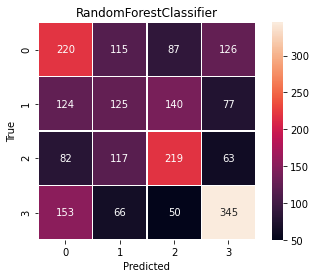

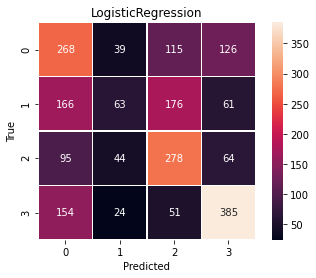

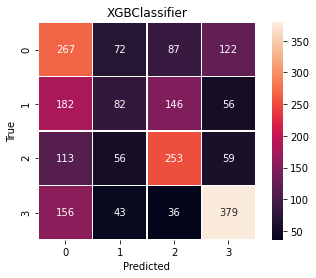

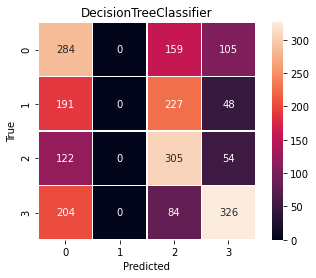

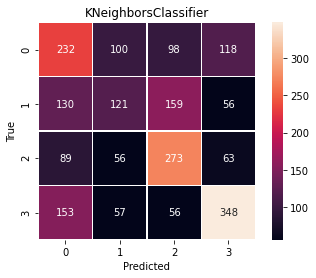

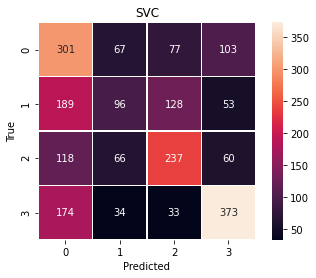

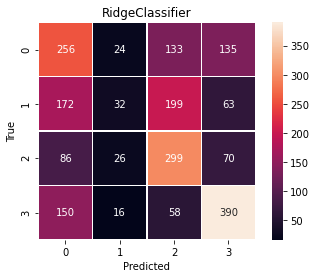

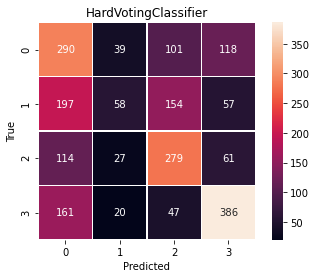

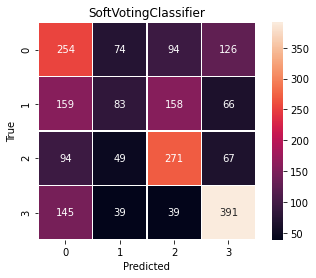

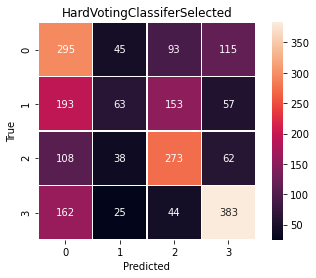

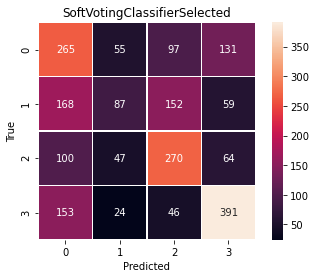

In [87]:
# Import library
from sklearn.metrics import confusion_matrix

# Plot confusion matrices using seaborn heatmap
for i, pred in enumerate(pred_list):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, linewidths=0.4, square=True, fmt='.3g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title_list[i])
    plt.show()
    print('\n')
